### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [3]:
dir_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Raw_Recordings"
csv_path = "/Users/ecem/Desktop/csv of scgs"

In [4]:
diseased = np.load(dir_path + "/diseased-10sec.npy", allow_pickle= True)


In [5]:
diseased.shape

(3, 2392, 2560)

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

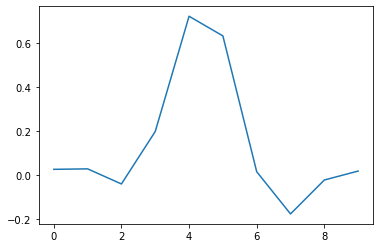

In [6]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(diseased[0][0], w, level=6)

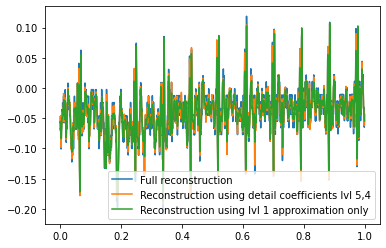

In [7]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

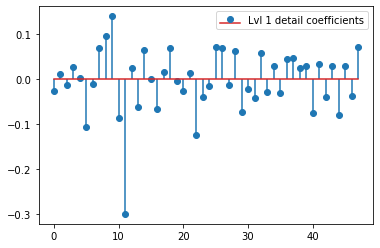

In [8]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

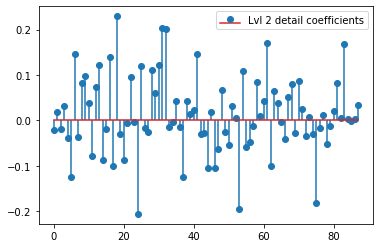

In [9]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


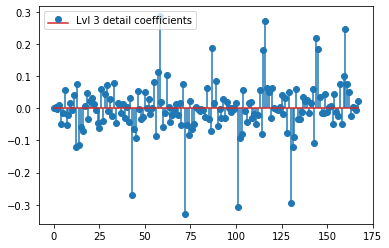

In [10]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


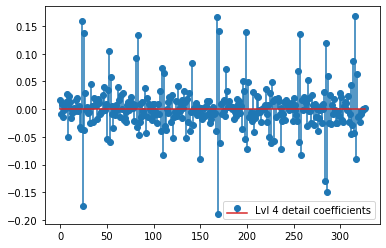

In [11]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


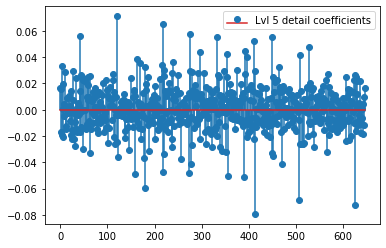

In [12]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


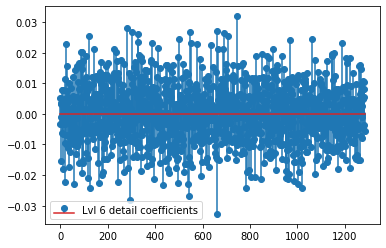

In [13]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [14]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(diseased[0][0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = diseased[0][0] - approx_lvl1_interp

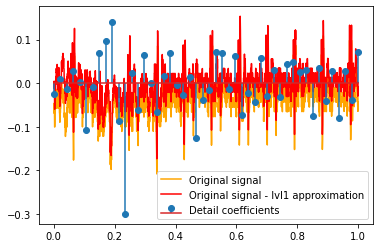

In [15]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(diseased[0][0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

### Now let's get coef for all pieces

In [16]:
coef_diseased_x, coef_diseased_y, coef_diseased_z = [], [], []
for i in range(len(diseased[0])):
    coef_diseased_x.append(pywt.wavedec(diseased[0][i], w, level=6))
    coef_diseased_y.append(pywt.wavedec(diseased[1][i], w, level=6))
    coef_diseased_z.append(pywt.wavedec(diseased[2][i], w, level=6))

In [17]:
import pandas as pd

In [18]:
diseased = np.stack((coef_diseased_x, coef_diseased_y, coef_diseased_z), axis = 0)

In [19]:
diseased.shape

(3, 2392, 7)

In [26]:
diseased[0][9][0]

array([-0.20485932, -0.18922918, -0.18864389, -0.19210407, -0.12359731,
        0.0149831 ,  0.03428363, -0.07396685,  0.02699096, -0.04808057,
       -0.07677236, -0.05735258, -0.10197557, -0.08507388, -0.22092852,
       -0.16052533, -0.20590716, -0.21207722, -0.13081406, -0.07225205,
       -0.06564273, -0.17977912, -0.08943146, -0.07874746, -0.07134382,
       -0.1375093 , -0.16753076, -0.17512196, -0.25381385, -0.22056551,
       -0.12289231, -0.02587684, -0.01139199,  0.05384154, -0.05757327,
       -0.06769591, -0.06582149, -0.14956702, -0.11888289, -0.19860064,
       -0.12611119, -0.14795482, -0.3769203 , -0.45194112, -0.45387935,
       -0.50952687, -0.48173651, -0.44418262])

In [29]:
diseased[0][9]

array([array([-0.20485932, -0.18922918, -0.18864389, -0.19210407, -0.12359731,
        0.0149831 ,  0.03428363, -0.07396685,  0.02699096, -0.04808057,
       -0.07677236, -0.05735258, -0.10197557, -0.08507388, -0.22092852,
       -0.16052533, -0.20590716, -0.21207722, -0.13081406, -0.07225205,
       -0.06564273, -0.17977912, -0.08943146, -0.07874746, -0.07134382,
       -0.1375093 , -0.16753076, -0.17512196, -0.25381385, -0.22056551,
       -0.12289231, -0.02587684, -0.01139199,  0.05384154, -0.05757327,
       -0.06769591, -0.06582149, -0.14956702, -0.11888289, -0.19860064,
       -0.12611119, -0.14795482, -0.3769203 , -0.45194112, -0.45387935,
       -0.50952687, -0.48173651, -0.44418262]),
       array([-0.01655551,  0.01378197, -0.01370737,  0.01635133, -0.01913824,
        0.0443657 , -0.0926889 ,  0.02424107, -0.00495444,  0.00053624,
        0.06520044, -0.1014213 ,  0.02596583,  0.04341999,  0.0011176 ,
        0.02125779, -0.04547677,  0.02565927, -0.0096983 ,  0.07466428,
  

In [28]:
diseased[0][9][1]

array([-0.01655551,  0.01378197, -0.01370737,  0.01635133, -0.01913824,
        0.0443657 , -0.0926889 ,  0.02424107, -0.00495444,  0.00053624,
        0.06520044, -0.1014213 ,  0.02596583,  0.04341999,  0.0011176 ,
        0.02125779, -0.04547677,  0.02565927, -0.0096983 ,  0.07466428,
        0.00433957,  0.02676324,  0.00476311, -0.06367729,  0.0420754 ,
       -0.05833019,  0.04572991, -0.0096877 , -0.02168682,  0.01299454,
        0.0268332 ,  0.07247527,  0.00198254,  0.01797649, -0.0909373 ,
       -0.05147586, -0.03540202,  0.10410914,  0.09059052, -0.00855729,
        0.03506368, -0.08093064,  0.03337862, -0.00485271, -0.16431407,
        0.09287057, -0.11245759,  0.14061733])

### Level by level

In [20]:
def level_coef_extractor_3d(array, lvl = 0):
    
    lenn = array[0][0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0], array.shape[1], lenn)) #219,48
    
    for i in range(array.shape[1]):
        coef[0,i,:] = array[0][i][lvl]
        coef[1,i,:] = array[1][i][lvl]
        coef[2,i,:] = array[2][i][lvl]
        
    return coef

In [21]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [26]:
saver(diseased, 0, dir_path, 'four-disease')


### Check whether each data saved correctly

In [27]:
def column_namer(level = 0, lenght = 48):
    x, y, z = [], [], []
    for i in range(lenght):
        x.append("lvl{0}_x{1}".format(level, i))
        y.append("lvl{0}_y{1}".format(level, i))
        z.append("lvl{0}_z{1}".format(level, i))
    
    return x + y + z

In [28]:
import pandas as pd

In [30]:
def dataframe_checker(path, name = "four-disease", df = pd.DataFrame(), level = 0):

    values  = []

    array = np.load(path + "/" + name + "_lvl_{}.npy".format(level), allow_pickle = True)
    columns = column_namer(level = level, lenght = array.shape[2])
    
    for i in range(array.shape[1]):
        values.append(array[0][i].tolist()+ array[1][i].tolist()+ array[2][i].tolist()) 

        medium = pd.DataFrame([values[i]], columns = columns)
        
        df = pd.concat([df, medium], axis = 0)
        
    
    return df

In [31]:
df = dataframe_checker(dir_path,  level = 0 )
df

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z38,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47
0,-0.503078,-0.508493,-0.495124,-0.461686,-0.327573,-0.463505,-0.319357,-0.290070,-0.372214,-0.670804,...,-0.004803,-0.009975,-0.013297,0.031506,0.034660,0.121152,0.158909,0.128339,0.134332,0.149062
0,-0.337088,-0.358658,-0.344212,-0.297174,-0.193528,-0.346729,-0.177544,-0.201896,-0.263341,-0.287319,...,-0.056027,-0.044484,-0.025730,0.040819,-0.007631,-0.004883,-0.056402,-0.067213,-0.057641,-0.039950
0,-0.382271,-0.409044,-0.397055,-0.353910,-0.297396,-0.389712,-0.234055,-0.194504,-0.231223,-0.298895,...,0.017353,0.029110,0.004084,-0.041428,-0.044852,-0.034972,0.053526,0.039660,0.035398,0.031143
0,0.071162,0.089320,0.064081,-0.037265,-0.353574,-0.289820,-0.397483,-0.365879,-0.382827,-0.204690,...,0.052188,-0.078633,-0.044265,-0.024217,-0.029692,0.051737,0.043672,0.048377,0.047015,0.038573
0,-0.790181,-0.790978,-0.778167,-0.723883,-0.509830,-0.586515,-0.283325,-0.336158,-0.268263,-0.318504,...,-0.014478,0.017597,-0.019702,-0.037006,0.019880,0.066369,0.091973,0.078102,0.079841,0.083903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.254162,0.256369,0.261570,0.288534,0.391812,0.492755,0.414114,0.194791,-0.130332,-0.118806,...,0.014821,0.009703,0.038727,0.016893,0.051154,0.023889,0.014518,0.018233,0.018315,0.018180
0,0.349622,0.321284,0.310296,0.278119,0.003263,-0.149820,-0.205826,-0.210372,-0.252378,-0.305266,...,0.006079,-0.028282,-0.056236,-0.020658,-0.042306,-0.025261,0.045890,0.026822,0.025429,0.030637
0,-0.163857,-0.138495,-0.157529,-0.233442,-0.414839,-0.340551,-0.398183,-0.368650,-0.085265,0.094994,...,-0.026788,-0.088121,-0.051529,-0.048913,-0.070555,-0.049824,-0.080925,-0.069791,-0.070239,-0.077539
0,-0.383882,-0.363848,-0.364389,-0.366114,-0.272939,0.017750,0.177799,0.347536,0.578930,0.653146,...,-0.055060,-0.042704,-0.035764,-0.022767,0.005606,0.042350,0.034094,0.036432,0.035644,0.033274


In [32]:
df.to_csv(csv_path + '/four-disease-wavelet-lvl0-coef.csv')

# Mean wavelet

In [33]:
def dataframe_creator(array, df = pd.DataFrame()):
    values= []
    for i in range(array.shape[1]):
        values.append([[array[0][i][0].mean(), array[0][i][1].mean(), array[0][i][2].mean(), array[0][i][3].mean(),
                        array[0][i][4].mean(), array[0][i][5].mean(), array[0][i][6].mean(),
                        array[1][i][0].mean(), array[1][i][1].mean(), array[1][i][2].mean(), array[1][i][3].mean(),
                        array[1][i][4].mean(), array[1][i][5].mean(), array[1][i][6].mean(),
                        array[2][i][0].mean(), array[2][i][1].mean(), array[2][i][2].mean(), array[2][i][3].mean(),
                        array[2][i][4].mean(),array[2][i][5].mean(), array[2][i][6].mean()]])


        medium = pd.DataFrame(values[i], columns =["lvl_x1", "lvl_x2", "lvl_x3", "lvl_x4", "lvl_x5","lvl_x6", "lvl_x7",
                                        "lvl_y1", "lvl_y2", "lvl_y3", "lvl_y4", "lvl_y5","lvl_y6", "lvl_y7",
                                        "lvl_z1", "lvl_z2", "lvl_z3", "lvl_z4", "lvl_z5","lvl_z6", "lvl_z7"
                                                 ])
        df = pd.concat([df, medium], axis = 0)

    return df

In [34]:
df_w =  pd.DataFrame(columns =["lvl_x1", "lvl_x2", "lvl_x3", "lvl_x4", "lvl_x5","lvl_x6", "lvl_x7",
                                        "lvl_y1", "lvl_y2", "lvl_y3", "lvl_y4", "lvl_y5","lvl_y6", "lvl_y7",
                                        "lvl_z1", "lvl_z2", "lvl_z3", "lvl_z4", "lvl_z5","lvl_z6", "lvl_z7"
                                                 ])
df_w

,lvl_x1,lvl_x2,lvl_x3,lvl_x4,lvl_x5,lvl_x6,lvl_x7,lvl_y1,lvl_y2,lvl_y3,...,lvl_y5,lvl_y6,lvl_y7,lvl_z1,lvl_z2,lvl_z3,lvl_z4,lvl_z5,lvl_z6,lvl_z7


In [35]:
df_w = dataframe_creator(diseased, df = df_w)


df_w.reset_index(drop = True, inplace = True)
df_w

,lvl_x1,lvl_x2,lvl_x3,lvl_x4,lvl_x5,lvl_x6,lvl_x7,lvl_y1,lvl_y2,lvl_y3,...,lvl_y5,lvl_y6,lvl_y7,lvl_z1,lvl_z2,lvl_z3,lvl_z4,lvl_z5,lvl_z6,lvl_z7
0,-0.345541,-0.004215,0.012522,-0.000444,0.001311,0.000406,-0.000041,0.184316,0.007161,-0.008526,...,-0.00057,-0.000194,0.000336,-0.00893,0.014729,-0.000682,0.001794,-0.002966,-0.000648,0.000022
1,-0.273343,0.000739,-0.00322,-0.001112,-0.001604,-0.000032,0.000201,0.096459,-0.004564,0.007695,...,0.000722,-0.000205,-0.000153,-0.003166,-0.009535,0.003375,0.001396,0.003397,-0.00024,0.00018
2,-0.263624,0.000413,-0.005284,-0.001486,-0.000138,-0.000489,0.000041,-0.003456,-0.01007,0.005924,...,-0.00094,-0.000268,0.000045,-0.015194,0.001137,-0.012409,-0.002628,-0.003446,0.000506,0.000256
3,-0.341478,-0.004371,0.014861,0.007202,0.000489,0.00058,0.000105,0.024758,0.008543,-0.016927,...,0.001445,-0.000195,0.000188,-0.000652,0.005726,0.012457,-0.006032,0.000547,0.00021,-0.000077
4,-0.34343,-0.002166,-0.007141,-0.002059,-0.000725,-0.00004,0.00009,0.105367,-0.00391,0.018414,...,0.000315,-0.000061,0.00008,0.008253,-0.000452,-0.01651,-0.00337,-0.004062,0.000638,0.00056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,0.016465,0.002972,-0.001682,0.000326,-0.000033,-0.000025,-0.00011,0.014407,-0.006621,0.000462,...,0.000347,-0.000558,0.000046,-0.013158,0.005745,-0.000063,-0.002661,-0.000458,0.000953,-0.000036
2388,-0.087744,-0.001489,-0.002959,-0.001529,-0.000229,-0.000535,-0.000055,0.017711,0.001009,-0.00176,...,0.0003,-0.000706,0.000009,-0.005433,-0.003203,-0.000196,-0.002334,0.000109,0.000327,0.000032
2389,-0.077756,-0.001602,0.001775,0.000274,0.000203,-0.000447,-0.000076,0.046979,-0.001092,0.002223,...,-0.000647,0.000598,-0.000034,-0.012073,-0.004608,-0.000312,0.001894,-0.001521,-0.000648,0.000181
2390,-0.045109,0.001392,-0.000355,-0.000908,0.000429,0.000397,-0.000011,0.00565,-0.00479,0.003547,...,-0.000018,0.000032,0.00012,-0.011019,0.005633,0.002005,-0.002387,-0.001169,0.000117,0.000156


In [36]:
indexes = np.array([0,2,7,10,13,14])

df_w = df_w.iloc[:,indexes]
df_w

,lvl_x1,lvl_x3,lvl_y1,lvl_y4,lvl_y7,lvl_z1
0,-0.345541,0.012522,0.184316,0.00012,0.000336,-0.00893
1,-0.273343,-0.00322,0.096459,-0.001826,-0.000153,-0.003166
2,-0.263624,-0.005284,-0.003456,-0.000815,0.000045,-0.015194
3,-0.341478,0.014861,0.024758,-0.002421,0.000188,-0.000652
4,-0.34343,-0.007141,0.105367,0.002505,0.00008,0.008253
...,...,...,...,...,...,...
2387,0.016465,-0.001682,0.014407,-0.00122,0.000046,-0.013158
2388,-0.087744,-0.002959,0.017711,0.000642,0.000009,-0.005433
2389,-0.077756,0.001775,0.046979,-0.000194,-0.000034,-0.012073
2390,-0.045109,-0.000355,0.00565,-0.001519,0.00012,-0.011019


In [37]:
df_w.to_csv(csv_path + '/p-value-selected-four-disease-mean-wavelet.csv')